Totatl IPR at low and high freq

$IPR_{Total} = \prod_k IPR_k$

In [11]:
import numpy as np
from qutip import tensor, sigmax, sigmay, sigmaz, qeye, mesolve 
from qutip.floquet import floquet_modes
from scipy.special import j0

def drive(t, args):
    h0 = args['h0']
    h = args['h']
    w = args['omega']
    return h0 + h * np.cos(w * t)

def get_floquet_isingfermion(k, args, **kwargs):
    sx = sigmax()
    sz = sigmaz()
    
    H0 = np.sin(k) * sx + np.cos(k) * sz
    H1 = sz
    
    H = [H0,[H1,drive]]    
    T = 2 * np.pi/args['omega']

    return floquet_modes(H, T, args, **kwargs)

def get_iprvals_exact(k, params, **kwargs):
    f_states, f_energies = get_floquet_isingfermion(k, params, **kwargs)
    floquet_matrix = np.array(f_states)[:,:,0]
    return np.sum(np.abs(floquet_matrix)**4, axis=-1)

Plot both $\omega = 0.4, 90.0$

running for w= 0.4


100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:39<00:00, 16.62s/it]


running for w= 90.0


100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:23<00:00, 13.96s/it]


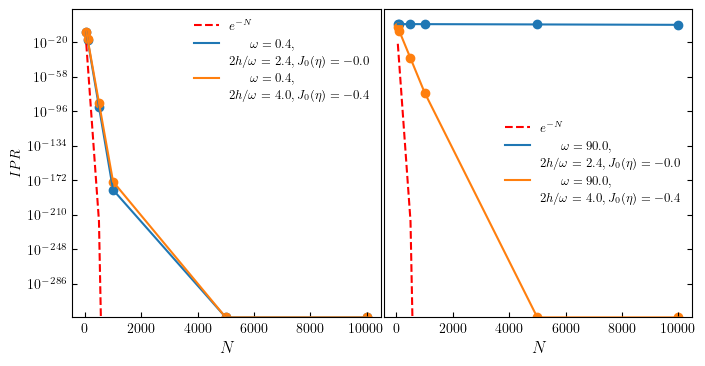

CPU times: user 3min 4s, sys: 252 ms, total: 3min 4s
Wall time: 3min 4s


In [16]:
%%time
import numpy as np
from tqdm import tqdm
from scipy.special import jn_zeros
import matplotlib.pyplot as plt
freezing_pts = jn_zeros(0,3)

plt.rcParams.update({"figure.figsize": (8,4),"text.usetex": True,"font.family": "sans-serif",
    "font.size": 10,"font.sans-serif": ["Helvetica"]})

fig, axs = plt.subplots(1, 2, sharex=False, sharey=True)
plt.subplots_adjust(wspace=0.01, hspace=0.0)

Ns = np.array([50,100,500,1000,5000,10000])
omegas = [0.4, 90.0]
etas = [freezing_pts[0], 4.0]

axs[0].set_ylabel(r"$IPR$")

for i, w in enumerate(omegas):   
    print('running for w=',w)
    ipr_tot_fr, ipr_tot_nfr = [], []
    for N in tqdm(Ns):
        fbz = np.linspace(-np.pi, np.pi, N)
        hvals = [w/2* etas[0], w/2*  etas[1]]

        iprmat = np.empty([len(hvals), len(fbz)])
        for x, h in enumerate(hvals):
            params = {'h0':0.0, 'h':h, 'omega':w}
            iprvals_exact = np.array([get_iprvals_exact(k, params, sort=True) for k in fbz])
            iprmat[x,:] = iprvals_exact[:,0]
        '''
        IPR_tot = Prod_k (ipr_k)
        
        '''
        ipr_tot_fr.append(np.prod(iprmat[0]))
        ipr_tot_nfr.append(np.prod(iprmat[1]))
        
    axs[i].plot(Ns, np.exp(-Ns), label = r'$e^{-N}$', linestyle='--', color='r')
        
    axs[i].scatter(Ns, ipr_tot_fr)
    axs[i].plot(Ns, ipr_tot_fr, label=fr"$\omega = {w:1.1f},\\ 2h/\omega={etas[0]:1.1f}, J_0(\eta)={j0(etas[0]):1.1f}$")
    axs[i].scatter(Ns, ipr_tot_nfr)
    axs[i].plot(Ns, ipr_tot_nfr, label=fr"$\omega = {w:1.1f},\\ 2h/\omega={etas[1]:1.1f}, J_0(\eta)={j0(etas[1]):1.1f}$")    
    
    axs[i].set_xlabel(r"$N$", fontsize= 12)
    axs[i].legend(fontsize= 9, frameon= False) 
    
    axs[i].tick_params(which='both', axis="x", direction="in")
    axs[i].tick_params(which='both', axis="y", direction="in")

#plt.ylim(1e-45, 10)    

axs[1].yaxis.tick_right()
plt.yscale('log')
plt.savefig('ipr_tot_k.svg', bbox_inches='tight', pad_inches=0.0, dpi = 600)
plt.savefig('ipr_tot_k.pdf', bbox_inches='tight', pad_inches=0.0, dpi = 600)
plt.show()

### Plot for  $\omega = 90.0$

100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [00:33<00:00,  3.33s/it]


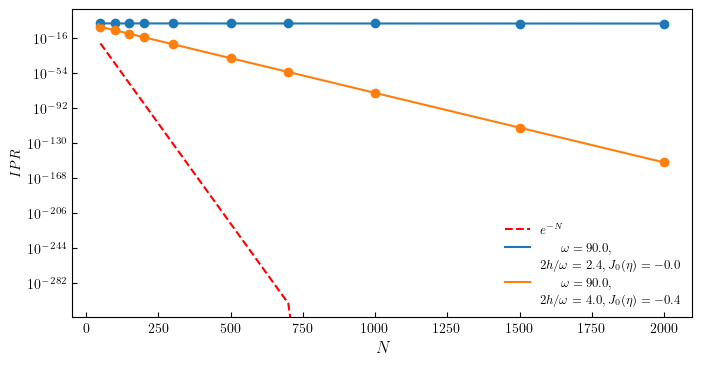

CPU times: user 34 s, sys: 64 ms, total: 34.1 s
Wall time: 34.1 s


In [17]:
%%time
import numpy as np
from tqdm import tqdm
from scipy.special import jn_zeros
import matplotlib.pyplot as plt
freezing_pts = jn_zeros(0,3)

plt.rcParams.update({"figure.figsize": (8,4),"text.usetex": True,"font.family": "sans-serif",
    "font.size": 10,"font.sans-serif": ["Helvetica"]})


Ns = np.array([50,100,150, 200,300, 500,700,1000,1500, 2000])
omega = 90.0
w= omega
etas = [freezing_pts[0], 4.0]

plt.ylabel(r"$IPR$")

ipr_tot_fr, ipr_tot_nfr = [], []
for N in tqdm(Ns):
    fbz = np.linspace(-np.pi, np.pi, N)
    hvals = [w/2* etas[0], w/2*  etas[1]]

    iprmat = np.empty([len(hvals), len(fbz)])
    for x, h in enumerate(hvals):
        params = {'h0':0.0, 'h':h, 'omega':w}
        iprvals_exact = np.array([get_iprvals_exact(k, params, sort=True) for k in fbz])
        iprmat[x,:] = iprvals_exact[:,0]
    '''
    IPR_tot = Prod_k (ipr_k)

    '''
    ipr_tot_fr.append(np.prod(iprmat[0]))
    ipr_tot_nfr.append(np.prod(iprmat[1]))

plt.plot(Ns, np.exp(-Ns), label = r'$e^{-N}$', linestyle='--', color='r')

plt.scatter(Ns, ipr_tot_fr)
plt.plot(Ns, ipr_tot_fr, label=fr"$\omega = {w:1.1f},\\ 2h/\omega={etas[0]:1.1f}, J_0(\eta)={j0(etas[0]):1.1f}$")
plt.scatter(Ns, ipr_tot_nfr)
plt.plot(Ns, ipr_tot_nfr, label=fr"$\omega = {w:1.1f},\\ 2h/\omega={etas[1]:1.1f}, J_0(\eta)={j0(etas[1]):1.1f}$")    

plt.xlabel(r"$N$", fontsize= 12)
plt.legend(fontsize= 9, frameon= False) 

plt.tick_params(which='both', axis="x", direction="in")
plt.tick_params(which='both', axis="y", direction="in")

#plt.ylim(1e-45, 10)   
plt.yscale('log')
figname = 'ipr_tot_k_w' +str(w)+ '_.svg'
figname1 = 'ipr_tot_k_w' +str(w)+ '_.pdf'
plt.savefig(figname, bbox_inches='tight', pad_inches=0.0, dpi = 900)
plt.savefig(figname1, bbox_inches='tight', pad_inches=0.0, dpi = 900)
plt.show()

### Plot  $\omega = 0.4$

100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.78s/it]


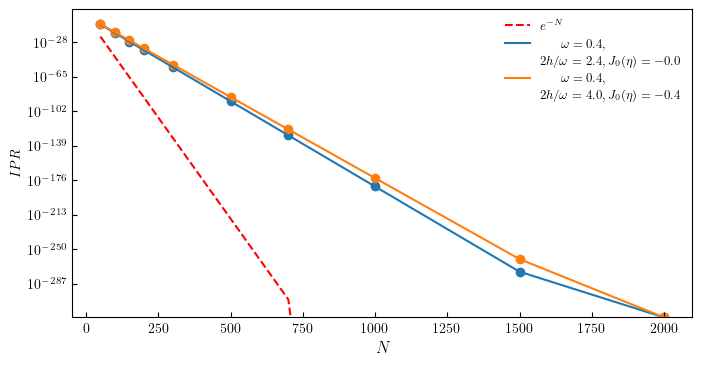

CPU times: user 38.5 s, sys: 131 ms, total: 38.6 s
Wall time: 38.6 s


In [18]:
%%time
import numpy as np
from tqdm import tqdm
from scipy.special import jn_zeros
import matplotlib.pyplot as plt
freezing_pts = jn_zeros(0,3)

plt.rcParams.update({"figure.figsize": (8,4),"text.usetex": True,"font.family": "sans-serif",
    "font.size": 10,"font.sans-serif": ["Helvetica"]})


Ns = np.array([50,100,150, 200,300, 500,700,1000,1500, 2000])
omega = 0.4
w= omega
etas = [freezing_pts[0], 4.0]

plt.ylabel(r"$IPR$")

ipr_tot_fr, ipr_tot_nfr = [], []
for N in tqdm(Ns):
    fbz = np.linspace(-np.pi, np.pi, N)
    hvals = [w/2* etas[0], w/2*  etas[1]]

    iprmat = np.empty([len(hvals), len(fbz)])
    for x, h in enumerate(hvals):
        params = {'h0':0.0, 'h':h, 'omega':w}
        iprvals_exact = np.array([get_iprvals_exact(k, params, sort=True) for k in fbz])
        iprmat[x,:] = iprvals_exact[:,0]
    '''
    IPR_tot = Prod_k (ipr_k)

    '''
    ipr_tot_fr.append(np.prod(iprmat[0]))
    ipr_tot_nfr.append(np.prod(iprmat[1]))

plt.plot(Ns, np.exp(-Ns), label = r'$e^{-N}$', linestyle='--', color='r')

plt.scatter(Ns, ipr_tot_fr)
plt.plot(Ns, ipr_tot_fr, label=fr"$\omega = {w:1.1f},\\ 2h/\omega={etas[0]:1.1f}, J_0(\eta)={j0(etas[0]):1.1f}$")
plt.scatter(Ns, ipr_tot_nfr)
plt.plot(Ns, ipr_tot_nfr, label=fr"$\omega = {w:1.1f},\\ 2h/\omega={etas[1]:1.1f}, J_0(\eta)={j0(etas[1]):1.1f}$")    

plt.xlabel(r"$N$", fontsize= 12)
plt.legend(fontsize= 9, frameon= False) 

plt.tick_params(which='both', axis="x", direction="in")
plt.tick_params(which='both', axis="y", direction="in")

#plt.ylim(1e-45, 10)   
plt.yscale('log')
figname = 'ipr_tot_k_w' +str(w)+ '_.svg'
figname1 = 'ipr_tot_k_w' +str(w)+ '_.pdf'
plt.savefig(figname, bbox_inches='tight', pad_inches=0.0, dpi = 900)
plt.savefig(figname1, bbox_inches='tight', pad_inches=0.0, dpi = 900)
plt.show()